# Visualizing Anxiety-Related Structural and Functional MRI Data

**Author**: Tianxin Shu  
**Date**: December 15, 2025  
**Concept Links**:  
- [Concept: Anxiety](https://neurosynth.org/analyses/terms/anxiety/)   

---

### Project Description:
This notebook visualizes Structural and Functional MRI data related to the concepts of "Anxiety" from Neurosynth.org. The notebook includes the following steps:
1. Loading and searching for relevant MRI files.
2. Visualizing the statistical map of functional data overlaid on structural data.
3. Analyzing the distribution of positive voxel intensities in the functional data.

### Loading MRI Files
This code cell searches for and loads the Structural MRI data (`*anatomical.nii`) and Functional MRI data (`anxiety*.nii`) from the specified project directory. The `os` and `glob` libraries are used to locate the files recursively.

In [2]:
import os
import glob

# Define the project directory
project_dir = "/Users/tianxinshu/Documents/PhD/Courses/2510python/anxiety_data"
# Search for files matching the specified patterns
bold_file = glob.glob(
    os.path.join(project_dir, "**", "*anxiety*.nii*"),
    recursive=True
)
anatomy_file = glob.glob(
    os.path.join(project_dir, "**", "*anatomical.nii*"),
    recursive=True
)

# Check if the files were found
if not bold_file:
    print("No functional MRI files (e.g., *anxiety*.nii*) found. Please check the directory path and file name spelling.")
else:
    print(f"Functional MRI file(s) found: {bold_file}")

if not anatomy_file:
    print("No structural MRI files (e.g., *anatomical.nii*) found. Please check the directory path and file name spelling.")
else:
    print(f"Structural MRI file(s) found: {anatomy_file}")


Functional MRI file(s) found: ['/Users/tianxinshu/Documents/PhD/Courses/2510python/anxiety_data/anxiety_uniformity-test_z_FDR_0.01.nii']
Structural MRI file(s) found: ['/Users/tianxinshu/Documents/PhD/Courses/2510python/anxiety_data/anatomical.nii']


### Visualizing the Statistical Map
This code cell uses the `nilearn` library to overlay the Functional MRI data on the Structural MRI data. The statistical map is displayed with a "hot" colormap, and the threshold is set to 0.1. The `cut_coords` parameter specifies the coordinates for the slices.

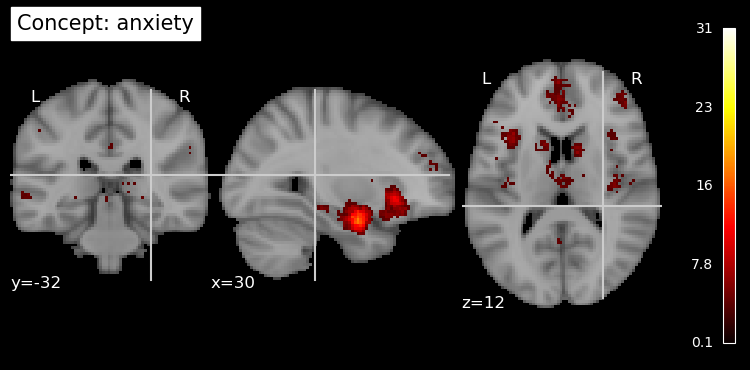

In [3]:
from nilearn import plotting
from nilearn.image import load_img

# Plot the statistical map
plotting.plot_stat_map(
    load_img(bold_file[0]),
    bg_img=anatomy_file[0],
    title="Concept: anxiety",
    cmap="hot",
    threshold=0.1,
    cut_coords=(30, -32, 12), 
)

plotting.show()



### Analyzing the Distribution of Positive Voxel Intensities
This code cell:
1. Loads the Functional MRI data using `nibabel`.
2. Extracts all positive voxel intensity values from the data.
3. Plots a histogram of the positive voxel intensities to analyze their distribution.

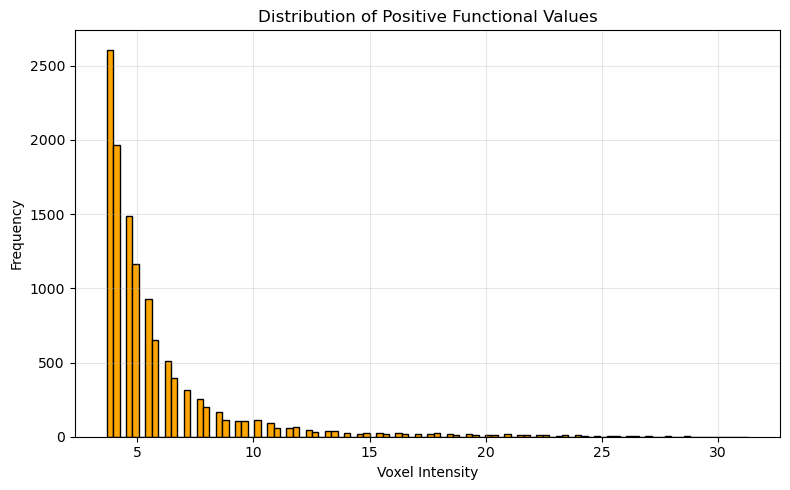

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Load functional data
# -------------------------
 
img = nib.load(bold_file[0])
data = img.get_fdata()

# -------------------------
# 2. Select positive values
# -------------------------
positive_values = data[data > 0]

# -------------------------
# 3. Plot histogram
# -------------------------
plt.figure(figsize=(8, 5))
plt.hist(positive_values, bins=100, color='orange', edgecolor='black')

# Customize
plt.title("Distribution of Positive Functional Values")
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
